In [ ]:
from google.colab import files
upload = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (1).csv


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
df["BMI Category"]= df["BMI Category"].replace({
    "Normal": "Normal Weight"
})

In [ ]:
df["BMI Category"].unique()

array(['Overweight', 'Normal Weight', 'Obese'], dtype=object)

In [ ]:
df.shape

(374, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


#Correlation Heatmap (for numeric features)

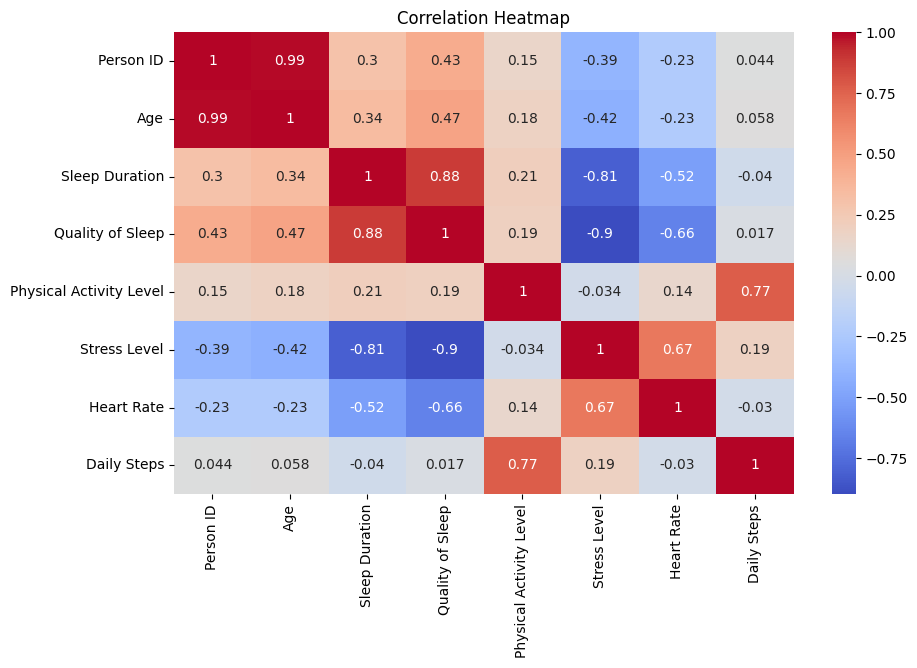

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot = True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Gender vs Sleep Quality

Text(0.5, 1.0, 'Sleep QUality by Gender')

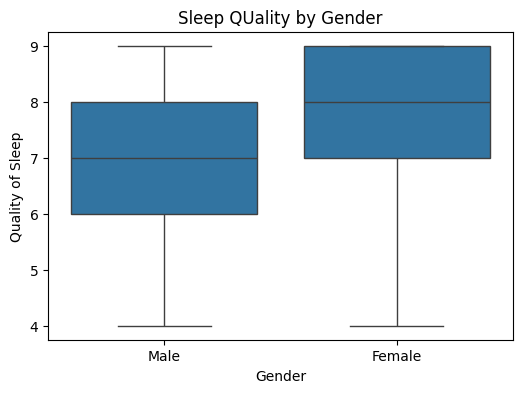

In [ ]:
plt.figure(figsize = (6, 4))
sns.boxplot(x="Gender", y="Quality of Sleep", data = df)
plt.title("Sleep QUality by Gender")


#BMI Category vs Sleep Quality

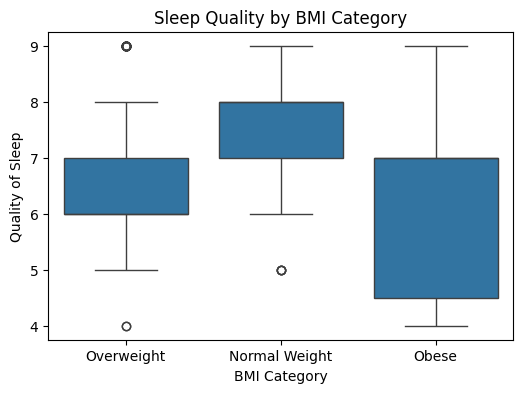

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="BMI Category", y="Quality of Sleep", data = df)
plt.title("Sleep Quality by BMI Category")
plt.show()

#Occupation vs Sleep Quality

/tmp/ipython-input-4109809194.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Occupation", y ="Quality of Sleep", data = df, ci = None) #includes a line for 95% CI


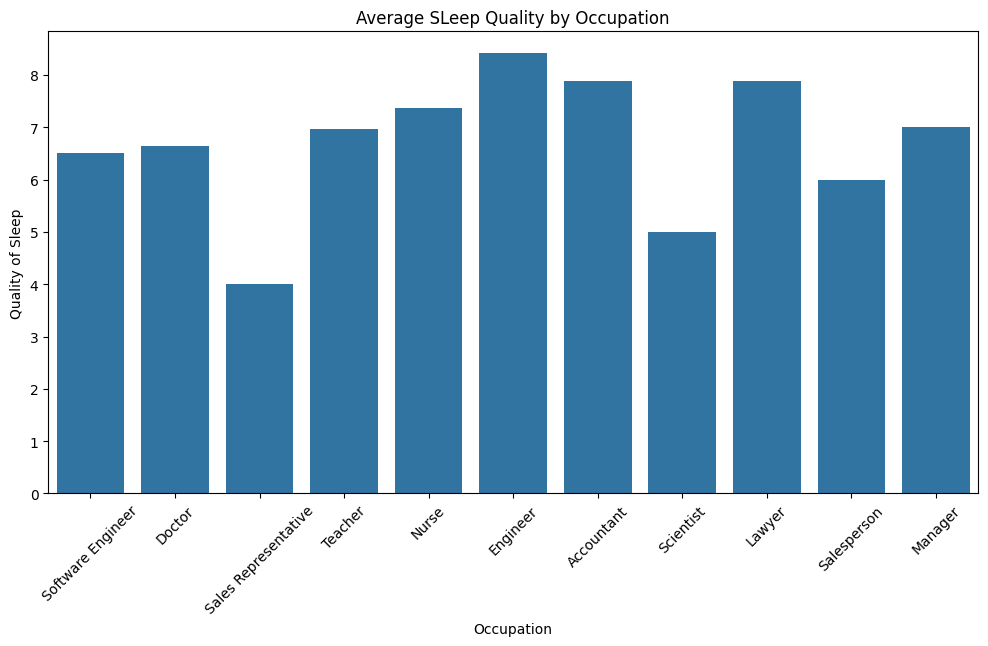

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x="Occupation", y ="Quality of Sleep", data = df, ci = None) #includes a line for 95% CI
plt.xticks(rotation = 45)
plt.title("Average SLeep Quality by Occupation")
plt.show()

#Handling Missing Values

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")
print(df["Sleep Disorder"].value_counts())

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


# Features and Target

In [ ]:
X = df.drop(columns = ["Person ID", "Quality of Sleep"])
y = df["Quality of Sleep"]


In [ ]:
print(X["Blood Pressure"].dtype)


object


In [ ]:
#Splitting blood pressure into systolic and diastolic
X[["Systolic", "Diastolic"]] = X["Blood Pressure"].str.split("/", expand = True) #expand = True: tells pandas to expand the list into seperate columns instead of keeping it as one list inside a cell (in this case 2 columns side by side)
X["Systolic"] = pd.to_numeric(X["Systolic"], errors = "coerce") #if pandas sees a value it cant turn into a number it replaces it w "NaN" instead of crashing"
X["Diastloic"]=pd.to_numeric(X["Diastolic"], errors = "coerce")

X=X.drop(columns = ["Blood Pressure"])

X[["Systolic", "Diastolic"]].head()

,Systolic,Diastolic
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90


#One hot encoding

In [ ]:
cat_cols = [c for c in ["Gender", "Occupation", "BMI Category", "Sleep Disorder"] if c in X.columns]

X_encode = pd.get_dummies(X, columns = cat_cols, dtype = int)

X_encode

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Diastloic,Gender_Female,...,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,27,6.1,42,6,77,4200,126,83,83,0,...,0,0,1,0,0,0,1,0,1,0
1,28,6.2,60,8,75,10000,125,80,80,0,...,0,0,0,0,1,0,0,0,1,0
2,28,6.2,60,8,75,10000,125,80,80,0,...,0,0,0,0,1,0,0,0,1,0
3,28,5.9,30,8,85,3000,140,90,90,0,...,0,0,0,0,0,1,0,0,0,1
4,28,5.9,30,8,85,3000,140,90,90,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,75,3,68,7000,140,95,95,1,...,0,0,0,0,0,0,1,0,0,1
370,59,8.0,75,3,68,7000,140,95,95,1,...,0,0,0,0,0,0,1,0,0,1
371,59,8.1,75,3,68,7000,140,95,95,1,...,0,0,0,0,0,0,1,0,0,1
372,59,8.1,75,3,68,7000,140,95,95,1,...,0,0,0,0,0,0,1,0,0,1


We dont need to drop a category from each column to avoid multicolinearity because we are working with trees. When working with linear models thats when models could get confused.

#building a function to drop outliers

In [ ]:
def drop_outliers(df, cols):
  df_clean=df.copy() #make a copy so you dont modify og df
  for col in cols:
    Q1=df_clean[col].quantile(.25)
    Q3=df_clean[col].quantile(.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    df_clean = df_clean[(df_clean[col]>=lower)&(df_clean[col]<=upper)]
  return df_clean

num_cols = X.select_dtypes(include=[np.number]).columns.tolist() #build list of numeric columns
X_no_outliers = drop_outliers(X, num_cols)

print(X.shape, X_no_outliers.shape)


(374, 13) (359, 13)


15 rows got dropped

#Modeling

In [ ]:
from sklearn.model_selection import train_test_split

X_final = X_encode.loc[X_no_outliers.index] #cleaned features (one-hot encoded and numeric with outliers removed)
y_final = df.loc[X_no_outliers.index, "Quality of Sleep"] #target, sligned so rows match after outlier removal

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.2, random_state = 42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (287, 28)
Test shape: (72, 28)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf=RandomForestRegressor(n_estimators = 200, random_state = 42) #initialize model
rf.fit(X_train, y_train) #train
y_pred = rf.predict(X_test) #predictions

mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(mse)
print(r2)


0.006703819444444448
0.9954410861865407


- Our mse is very small: predictions are almost exactly the same as the true sleep quality values
- our R^2 is very close to 1: almost perfect

Possible reasons:
- quality of sleep is determined by a few direct factors (sleep duration for example)
- overfitting: the model memorizes the training data instead of learning general rules (model will do great on test data and fail on new data)


In [ ]:
print("Train R^2:", rf.score(X_train, y_train)) #internally does predictions on training set and compares them
print("Test R^2:", rf.score(X_test, y_test)) #internally does predictions on test set and compares them

Train R^2: 0.9968558509620228
Test R^2: 0.9954410861865407


since train and test are really close, the model is not overfitting badly
- the dataset is just simple, and our target ("Quality of sleep") is strongly correlated with factors like sleep duration and stress level
- if train was high but test is much lower: the model overfit
- if oth are low: the model underfit

#Deployment

we save the model so we dont need to retrain every time

In [ ]:
import joblib #for saving python objects to a file and loading them later

#save model
joblib.dump(rf, "sleep_quality_model.pkl")

#load model
rf = joblib.load("sleep_quality_model.pkl")

In [ ]:
feature_names = X_train.columns.tolist() #columns from training
joblib.dump(feature_names, "feature_names.pkl")
len(feature_names), feature_names[:10]

(28,
 ['Age',
  'Sleep Duration',
  'Physical Activity Level',
  'Stress Level',
  'Heart Rate',
  'Daily Steps',
  'Systolic',
  'Diastolic',
  'Diastloic',
  'Gender_Female'])

#user imputs

In [ ]:
#pretend user input
user_input = {
    "Age": 30,
    "Sleep Duration": 6.5,
    "Physical Activity Level": 50,
    "Stress Level": 5,
    "Heart Rate": 70,
    "Daily Steps": 8000,
    "Systolic": 120,
    "Diastolic": 80,

    "Gender_Female": 1,
    "Gender_Male": 0,

    "Occupation_Doctor": 0,
    "Occupation_Nurse": 0,
    "Occupation_Sales Representative": 0,
    "Occupation_Software Engineer": 1,
    "Occupation_Teacher": 0,
    "Occupation_Lawyer": 0,
    "Occupation_Engineer": 0,
    "Occupation_Manager": 0,
    "Occupation_Accountant": 0,
    "Occupation_Scientist": 0,

    "BMI Category_Overweight": 0,
    "BMI Category_Obese": 0,
    "BMI Category_Normal Weight": 0,

    "Sleep Disorder_None": 1,
    "Sleep Disorder_Insomnia": 0,
    "Sleep Disorder_Sleep Apnea": 0,
}



In [ ]:
#turning dictionary into a table row
user_df = pd.DataFrame([user_input])
#models dont understand dictionaries, they need a df


In [ ]:
#reorders columns so they're in the same order as training
user_df = user_df.reindex(columns = feature_names, fill_value = 0)

pred = rf.predict(user_df)[0]


In [ ]:
print(f"Predicted Sleep Quality: {pred:.2f} / 10")


Predicted Sleep Quality: 6.78 / 10


In [ ]:
category_options = {"Gender": df["Gender"].unique().tolist(),
                    "Occupation": df["Occupation"].unique().tolist(),
                    "BMI Category": df["BMI Category"].unique().tolist(),
                    "Sleep Disorder": df["Sleep Disorder"].unique().tolist()
                    }

joblib.dump(category_options, "category_options.pkl")


['category_options.pkl']

In [ ]:
from google.colab import files
for fn in ["sleep_quality_model.pkl", "feature_names.pkl", "category_options.pkl"]:
  files.download(fn)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>